# 2D Stress Analysis 

###### - Visualization of 2D stress element 
###### - Finding Principle stresses and their planes using fundamental formulas
###### - Finding Maximum and Minimum Shear stresses and their planes

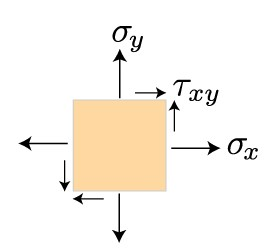

--Principle Angle theta_pa is 31.717474411461005 degrees
--Principle Angle theta_pb is 121.71747441146101 degrees
--Principle stress sigma_1 is 1.4635254915624212 N/mm^2
--Principle stress sigma_2 is -0.21352549156242118 N/mm^2
--------//////--------
--Max Shear Angle theta_s1 is -13.282525588538995 degrees
--Min Shear Angle theta_s2 is 76.71747441146101 degrees
--Max shear stress tau_max_1 is 0.8385254915624212 N/mm^2
--Min shear stress tau_max_2 is -0.8385254915624212 N/mm^2


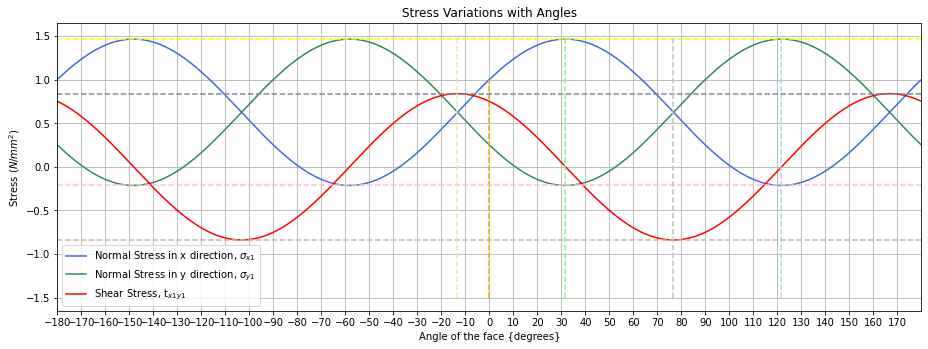

In [1]:
#PYTHON CODE FOR STRESS ELEMENT ANALYSIS

import math  # Math Functionality
import numpy as np  # Arrays functionality
import matplotlib.pyplot as plt  # Plotting Functionality


# Defining the Default Values
sig_x = 1 #N/mm^2
sig_y = 0.25 #N/mm^2
tau_xy = 0.75 #N/mm^2


# Theta
# Theta array from -180 deg (converted into radians later) to 180 deg
theta = np.arange(-180, 181)
theta_rad = (math.pi*theta)/180

#-->print(theta_rad)

#Defining Average Values for Principle stresses
sig_avg = (sig_x+sig_y)/2  #Sigma Average
H = math.sqrt(((sig_x-sig_y)/2)**2 + tau_xy**2) #Hypotenuse

#Principle Planes
theta_1 = 0.5*math.atan((2*tau_xy)/(sig_x-sig_y))
theta_1d = theta_1*(180/(math.pi))
theta_2d = theta_1d + 90

#Principle Stresses
sig_1 = sig_avg + H
sig_2 = sig_avg - H

#Max shear planes
theta_1s = theta_1d - 45
theta_2s = theta_1d + 45

#Max Shear stress
tau_max_1 = (sig_1-sig_2)/2
tau_max_2 = -tau_max_1

#Principle prints
print(f"--Principle Angle theta_pa is {theta_1d} degrees")
print(f"--Principle Angle theta_pb is {theta_2d} degrees")
print(f"--Principle stress sigma_1 is {sig_1} N/mm^2")
print(f"--Principle stress sigma_2 is {sig_2} N/mm^2")

#Max Shear Prints
print("--------//////--------")
print(f"--Max Shear Angle theta_s1 is {theta_1s} degrees")
print(f"--Min Shear Angle theta_s2 is {theta_2s} degrees")
print(f"--Max shear stress tau_max_1 is {tau_max_1} N/mm^2")
print(f"--Min shear stress tau_max_2 is {tau_max_2} N/mm^2")

# Transformation Equations
sig_x1 = 0.5*(sig_x+sig_y) + (sig_x - sig_y)/2 * np.cos(2*theta_rad) + tau_xy * np.sin(2*theta_rad)
sig_y1 = 0.5*(sig_x+sig_y) - (sig_x - sig_y)/2 * np.cos(2*theta_rad) - tau_xy * np.sin(2*theta_rad)
tau_x1y1 = -0.5*(sig_x - sig_y)*np.sin(2*theta_rad) + tau_xy * np.cos(2*theta_rad)

# Setting up figure and axes
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1])

#Plotting the arrray data vs sig_x1
axes.plot(theta, sig_x1, "royalblue", label="Normal Stress in x direction, $\sigma_{x1}$")
axes.plot(theta, sig_y1, "seagreen", label="Normal Stress in y direction, $\sigma_{y1}$")
axes.plot(theta, tau_x1y1,"red", label="Shear Stress, t$_{x1y1}$")
axes.plot([0,0],[-1.5,1], "orange", linestyle="--")

#Graph Aesthetics
axes.set_xlabel("Angle of the face {degrees}")
axes.set_ylabel("Stress (${N/mm^2}$)")
axes.set_title("Stress Variations with Angles")
axes.set_xlim(-180,180)
axes.set_xticks(np.arange(-180,180,10))

#Guidelines for Principle stresses
axes.plot([-180,180],[sig_1,sig_1], "yellow" , linestyle="--")
axes.plot([-180,180],[sig_2,sig_2], "pink" , linestyle="--")
axes.plot([theta_1d,theta_1d],[-1.5,1.5], "lightgreen" , linestyle="--")
axes.plot([theta_2d,theta_2d],[-1.5,1.5], "lightblue" , linestyle="--")

#Guidelines for Max Shear Stresses
axes.plot([-180,180],[tau_max_1,tau_max_1], "lightslategray" , linestyle="--")
axes.plot([-180,180],[tau_max_2,tau_max_2], "tan" , linestyle="--")
axes.plot([theta_1s,theta_1s],[-1.5,1.5], "palegoldenrod" , linestyle="--")
axes.plot([theta_2s,theta_2s],[-1.5,1.5], "silver" , linestyle="--")

#Show the plot
axes.legend(loc="lower left")
plt.grid()
plt.show()









#References
#----COLORS : (https://matplotlib.org/stable/gallery/color/named_colors.html)